MLPRegressor

14-11-2022

Data loading

In [39]:
import pandas as pd
import numpy
df  = pd.read_csv("D:\\00Research\\00Fog\\008Arman\\mcr-rt\\dataset-mcr-rt-180000.csv")
dataset = df.values
#print('Total rows:', df.shape[0]) #550892
X = dataset[:, 6] # rt column
print(numpy.min(X)," ",numpy.max(X))
Y = dataset[:, 5] # mcr column
print(numpy.min(Y)," ",numpy.max(Y))

0.01   20662.0
0.0253444780071999   4874.2


Correlation calc.

In [40]:
from scipy.stats import pearsonr

corr, _ = pearsonr(X, Y)
print('Pearsons correlation: %.3f' % corr)
print()

Pearsons correlation: 0.684



Split - Model - Fit - Predict

In [41]:
#Multi Layer Perceptron Neural Network
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#X = StandardScaler().fit_transform(X)
# reshaping the X-factor from 1D to 2D
X = X.reshape(-1, 1)
#Y = Y.reshape(-1, 1)
# splitting the data to train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
# neural network configuration
model = MLPRegressor(solver="adam", alpha=0.49, tol=2.8284271247461903, activation="tanh",
                           learning_rate="adaptive",
                           max_iter=100000)
model.fit(X_train, Y_train)
# performing prediction on the test set and storing the predicted cpu usage in Y_predict
Y_predict = model.predict(X_test)

from joblib import dump, load, numpy_pickle
import os

dump(model, os.path.join("D:\\00Research\\00Fog\\008Arman\\mcr-rt\\", "mlp.joblib"))

['D:\\00Research\\00Fog\\008Arman\\mcr-rt\\mlp.joblib']

Plot

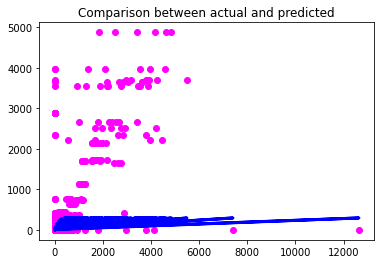

In [42]:
import matplotlib.pyplot as plt
plt.scatter(x=X_test, y=Y_test, color="magenta")
plt.plot(X_test, Y_predict, color="blue", linewidth=3)  
plt.title('Comparison between actual and predicted')
plt.ylabel('', fontsize=18)
plt.xlabel('', fontsize=18)
#plt.legend('Prediction')
plt.show()

Scatter

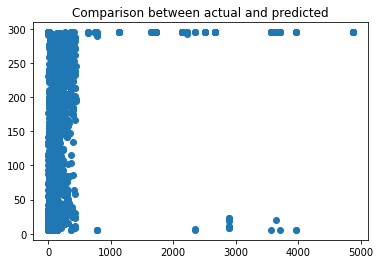

In [43]:
plt.scatter(x=Y_test, y=Y_predict)
plt.title('Comparison between actual and predicted')
plt.ylabel('', fontsize=18)
plt.xlabel('', fontsize=18)
plt.show()

Absolute Error

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#print(mean_squared_error(Y_test, Y_predict))
print("Accuracy is: ",numpy.round(mean_absolute_error(Y_test, Y_predict),4))
print('Coefficient of determination: %.2f' % r2_score(Y_test,Y_predict))

Accuracy is:  15.5899
Coefficient of determination: 0.19


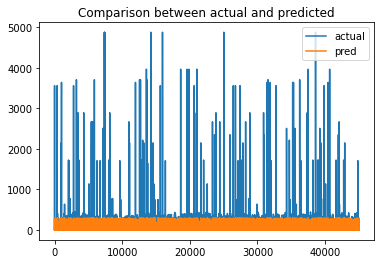

In [45]:
plt.plot(Y_test, label='actual')  # actual plot
plt.plot(Y_predict, label='pred')  # predicted plot
plt.title('Comparison between actual and predicted')
plt.ylabel('', fontsize=18)
plt.xlabel('', fontsize=18)
plt.legend()
plt.show()